### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### 1) Read the dataset

In [3]:
df = pd.read_excel('Coffee.xlsx')
df.head()

,Area Code,Date,Market,Market Size,Product,Product Line,Product Type,State,Type,Budget COGS,Budget Margin,Budget Profit,Budget Sales,COGS,Inventory,Margin,Marketing,Profit,Sales,Total Expenses
0,719,40909,Central,Major Market,Amaretto,Beans,Coffee,Colorado,Regular,90,130,100,220,89,777,130,24,94,219,36
1,970,40909,Central,Major Market,Colombian,Beans,Coffee,Colorado,Regular,80,110,80,190,83,623,107,27,68,190,39
2,970,40909,Central,Major Market,Decaf Irish Cream,Beans,Coffee,Colorado,Decaf,100,140,110,240,95,821,139,26,101,234,38
3,303,40909,Central,Major Market,Green Tea,Leaves,Tea,Colorado,Regular,30,50,30,80,44,623,56,14,30,100,26
4,303,40909,Central,Major Market,Caffe Mocha,Beans,Espresso,Colorado,Regular,60,90,70,150,54,456,80,15,54,134,26


- The dataset consists of 20 features and 4248 samples

In [5]:
df.shape

(4248, 20)

In [6]:
df.columns

Index(['Area Code', 'Date', 'Market', 'Market Size', 'Product', 'Product Line',
       'Product Type', 'State', 'Type', 'Budget COGS', 'Budget Margin',
       'Budget Profit', 'Budget Sales', 'COGS', 'Inventory', 'Margin',
       'Marketing', 'Profit', 'Sales', 'Total Expenses'],
      dtype='object')

In [7]:
# Checking datatypes of each feature
df.dtypes

Area Code          int64
Date               int64
Market            object
Market Size       object
Product           object
Product Line      object
Product Type      object
State             object
Type              object
Budget COGS        int64
Budget Margin      int64
Budget Profit      int64
Budget Sales       int64
COGS               int64
Inventory          int64
Margin             int64
Marketing          int64
Profit             int64
Sales              int64
Total Expenses     int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Area Code       4248 non-null   int64 
 1   Date            4248 non-null   int64 
 2   Market          4248 non-null   object
 3   Market Size     4248 non-null   object
 4   Product         4248 non-null   object
 5   Product Line    4248 non-null   object
 6   Product Type    4248 non-null   object
 7   State           4248 non-null   object
 8   Type            4248 non-null   object
 9   Budget COGS     4248 non-null   int64 
 10  Budget Margin   4248 non-null   int64 
 11  Budget Profit   4248 non-null   int64 
 12  Budget Sales    4248 non-null   int64 
 13  COGS            4248 non-null   int64 
 14  Inventory       4248 non-null   int64 
 15  Margin          4248 non-null   int64 
 16  Marketing       4248 non-null   int64 
 17  Profit          4248 non-null   int64 
 18  Sales   

#### 2) Remove/Handle null values if any

In [9]:
df.isnull().sum()

Area Code         0
Date              0
Market            0
Market Size       0
Product           0
Product Line      0
Product Type      0
State             0
Type              0
Budget COGS       0
Budget Margin     0
Budget Profit     0
Budget Sales      0
COGS              0
Inventory         0
Margin            0
Marketing         0
Profit            0
Sales             0
Total Expenses    0
dtype: int64

- 0 denotes there is no null value in the dataset

In [10]:
df['Market'].value_counts()

Central    1344
West       1344
East        888
South       672
Name: Market, dtype: int64

In [11]:
df['Product Type'].value_counts()

Espresso      1176
Coffee        1056
Herbal Tea    1056
Tea            960
Name: Product Type, dtype: int64

In [12]:
df['Product'].value_counts()

Colombian            480
Caffe Mocha          480
Lemon                480
Decaf Espresso       408
Decaf Irish Cream    384
Chamomile            384
Darjeeling           384
Green Tea            288
Earl Grey            288
Caffe Latte          216
Amaretto             192
Mint                 192
Regular Espresso      72
Name: Product, dtype: int64

In [13]:
dw = df[(df['Product']!='Decaf Espresso') & (df['Product']!='Regular Espresso')]
dw.shape

(3768, 20)

In [14]:
dw1 = dw[dw['Product Type']!='Espresso']
dw1.shape

(3072, 20)

In [15]:
df['Type'].value_counts()

Regular    2400
Decaf      1848
Name: Type, dtype: int64

In [16]:
df['Market Size'].value_counts()

Small Market    2544
Major Market    1704
Name: Market Size, dtype: int64

In [17]:
df['Product Line'].value_counts()

Beans     2232
Leaves    2016
Name: Product Line, dtype: int64

In [18]:
df['State'].value_counts()

Utah             288
California       288
Colorado         264
Oregon           264
Nevada           264
Washington       240
Florida          216
Illinois         216
Wisconsin        216
Ohio             216
Missouri         216
Iowa             216
New York         192
Connecticut      168
New Hampshire    168
Louisiana        168
New Mexico       168
Oklahoma         168
Texas            168
Massachusetts    144
Name: State, dtype: int64

### Visualization

#### 3) Depict different Market types and their count on a bar chart

In [19]:
df.columns

Index(['Area Code', 'Date', 'Market', 'Market Size', 'Product', 'Product Line',
       'Product Type', 'State', 'Type', 'Budget COGS', 'Budget Margin',
       'Budget Profit', 'Budget Sales', 'COGS', 'Inventory', 'Margin',
       'Marketing', 'Profit', 'Sales', 'Total Expenses'],
      dtype='object')

In [20]:
d1 = df['Market'].value_counts()
print(type(d1))
d1

<class 'pandas.core.series.Series'>


Central    1344
West       1344
East        888
South       672
Name: Market, dtype: int64

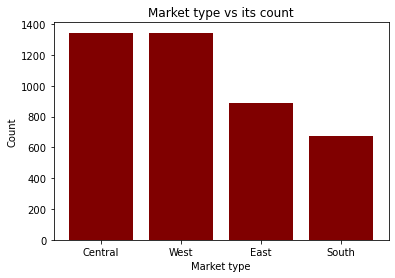

In [21]:
plt.bar(d1.index,d1,color='maroon')
plt.title('Market type vs its count')
plt.xlabel('Market type')
plt.ylabel('Count')
plt.show()

#### 4) Depict different Product types and their count on a line chart

In [22]:
d2 = df['Product'].value_counts()
d2

Colombian            480
Caffe Mocha          480
Lemon                480
Decaf Espresso       408
Decaf Irish Cream    384
Chamomile            384
Darjeeling           384
Green Tea            288
Earl Grey            288
Caffe Latte          216
Amaretto             192
Mint                 192
Regular Espresso      72
Name: Product, dtype: int64

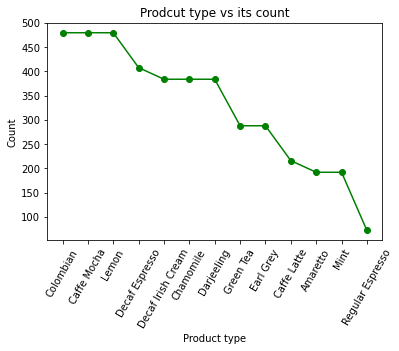

In [23]:
plt.plot(d2.index,d2,color='green',marker='o')
plt.title('Prodcut type vs its count')
plt.xlabel('Product type')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.show()

#### 5) Depict different State and their count on a pie chart

In [24]:
d3 = df['State'].value_counts()
d3

Utah             288
California       288
Colorado         264
Oregon           264
Nevada           264
Washington       240
Florida          216
Illinois         216
Wisconsin        216
Ohio             216
Missouri         216
Iowa             216
New York         192
Connecticut      168
New Hampshire    168
Louisiana        168
New Mexico       168
Oklahoma         168
Texas            168
Massachusetts    144
Name: State, dtype: int64

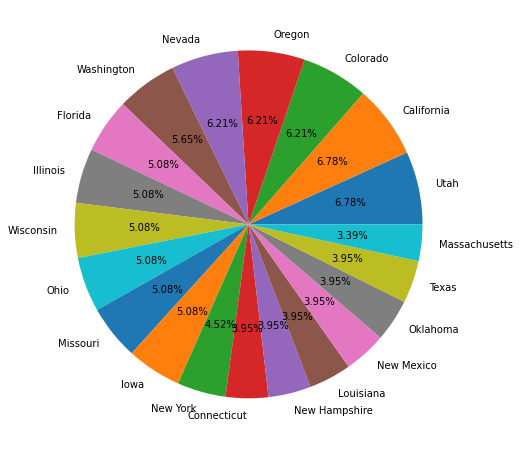

In [25]:
plt.figure(figsize=(8,8))
plt.pie(d3,labels=d3.index,autopct="%.2f%%")
# plt.legend(loc=8)
plt.show()

#### 6) Depict Market wise sum of Profit and depict the result on bar chart

In [26]:
d4 = df.groupby('Market')["Profit"].sum()
d4

Market
Central    93852
East       59217
South      32478
West       73996
Name: Profit, dtype: int64

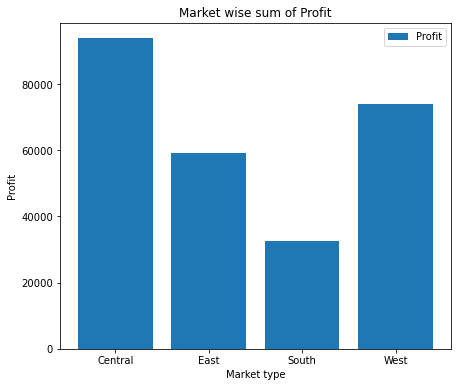

In [27]:
plt.figure(figsize=(7,6))
plt.bar(d4.index,d4,label='Profit')
plt.title('Market wise sum of Profit')
plt.legend()
plt.xlabel('Market type')
plt.ylabel('Profit')
plt.show()

#### 7) Depict Product wise mean of Sales and depict the result on bar chart and line chart superimposed

In [28]:
d5 = df.groupby('Product')["Sales"].mean()
d5

Product
Amaretto             136.817708
Caffe Latte          166.199074
Caffe Mocha          176.883333
Chamomile            196.817708
Colombian            267.314583
Darjeeling           190.497396
Decaf Espresso       191.573529
Decaf Irish Cream    162.104167
Earl Grey            231.847222
Green Tea            114.062500
Lemon                199.845833
Mint                 185.989583
Regular Espresso     333.763889
Name: Sales, dtype: float64

In [29]:
# w1 = d5.index.tolist()
# w2 = d5.values.tolist()
# print(w1)
# print(w2)

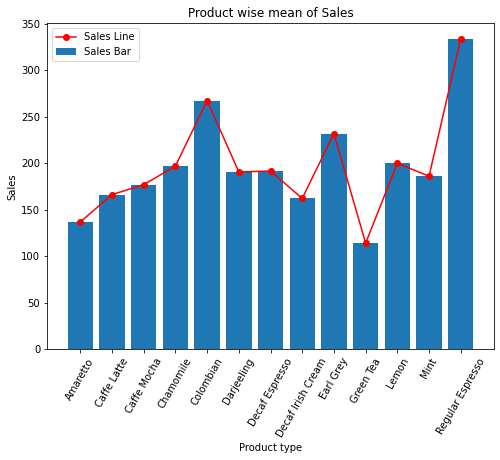

In [30]:
plt.figure(figsize=(8,6))
plt.bar(d5.index,d5,label='Sales Bar')
plt.plot(d5.index,d5,color='red',marker='o',label='Sales Line')
# plt.bar(w1,w2,label='Sales')
# for i in range(len(w1)):
#     plt.annotate(xy = [w2[i]-0.2,15],s=(w2[i]))
plt.title('Product wise mean of Sales')
plt.legend()
plt.xlabel('Product type')
plt.ylabel('Sales')
plt.xticks(rotation=60)
plt.show()

#### 8) Depict Profit vs Sales on a Scatter Chart where Product is 'Regular Espresso'

In [31]:
df['Product'].value_counts()

Colombian            480
Caffe Mocha          480
Lemon                480
Decaf Espresso       408
Decaf Irish Cream    384
Chamomile            384
Darjeeling           384
Green Tea            288
Earl Grey            288
Caffe Latte          216
Amaretto             192
Mint                 192
Regular Espresso      72
Name: Product, dtype: int64

In [32]:
d6 = df[df['Product']=='Regular Espresso']
# d6 = df.query('Product=="Regular Espresso"')
d6.shape

(72, 20)

In [34]:
d6.head()

,Area Code,Date,Market,Market Size,Product,Product Line,Product Type,State,Type,Budget COGS,Budget Margin,Budget Profit,Budget Sales,COGS,Inventory,Margin,Marketing,Profit,Sales,Total Expenses
74,978,40909,East,Major Market,Regular Espresso,Beans,Espresso,Massachusetts,Regular,160,170,110,330,170,1091,171,47,100,341,71
80,603,40909,East,Small Market,Regular Espresso,Beans,Espresso,New Hampshire,Regular,20,40,0,60,29,169,36,11,-8,65,44
88,631,40909,East,Major Market,Regular Espresso,Beans,Espresso,New York,Regular,210,270,200,480,228,1459,262,63,175,490,87
251,508,40940,East,Major Market,Regular Espresso,Beans,Espresso,Massachusetts,Regular,160,170,110,330,170,1073,170,47,99,340,71
257,603,40940,East,Small Market,Regular Espresso,Beans,Espresso,New Hampshire,Regular,20,40,0,60,30,165,38,11,-6,68,44


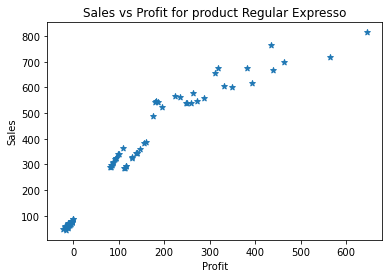

In [35]:
plt.scatter(d6['Profit'],d6['Sales'],marker='*')
plt.title('Sales vs Profit for product Regular Expresso')
plt.xlabel('Profit')
plt.ylabel('Sales')
plt.show()

#### 9) Depict Budget Profit vs Budget Sales on a Scatter Chart where State is California and Product is 'Earl Grey'

In [36]:
df.shape

(4248, 20)

In [37]:
d7 = df[(df['State']=='California') & (df['Product']=='Earl Grey')]
d7.shape

(24, 20)

In [38]:
# d7[['Budget Profit', 'Budget Sales']].drop_duplicate
d71 = d7.drop_duplicates(['Budget Profit', 'Budget Sales'])
d71[['Budget Profit', 'Budget Sales']]

,Budget Profit,Budget Sales
140,60,90
317,60,120
495,70,130
851,80,140
1027,80,150
1378,90,160
1730,50,80
1907,40,80
2084,50,90


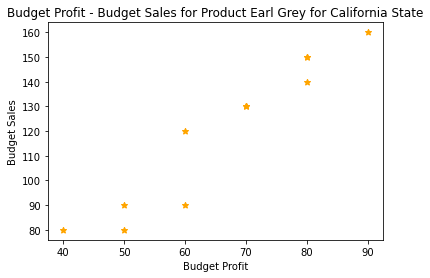

In [39]:
plt.scatter(d7['Budget Profit'],d7['Budget Sales'],marker='*',color='orange')
plt.title('Budget Profit - Budget Sales for Product Earl Grey for California State')
plt.xlabel('Budget Profit')
plt.ylabel('Budget Sales')
plt.show()

#### 10) Depcit Market wise mean of Budget Sales and mean of Sales in a stacked bar chart

In [40]:
d9 = df.groupby('Market')['Sales'].mean()
d10 = df.groupby('Market')['Budget Sales'].mean()
print(d9.shape)
print(d10.shape)

(4,)
(4,)


In [41]:
d9

Market
Central    197.206101
East       201.099099
South      154.651786
West       202.577381
Name: Sales, dtype: float64

In [42]:
d10

Market
Central    186.279762
East       177.815315
South      146.130952
West       178.348214
Name: Budget Sales, dtype: float64

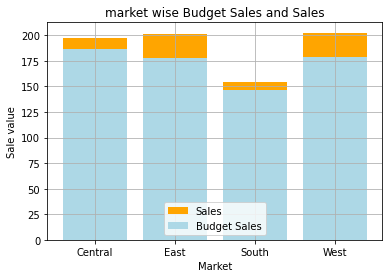

In [43]:
plt.bar(d9.index,d9,color='orange',label='Sales')
plt.bar(d10.index,d10,color='lightblue',label='Budget Sales')
plt.legend(loc=8)
plt.title('market wise Budget Sales and Sales')
plt.xlabel('Market')
plt.ylabel('Sale value')
plt.grid()
plt.show()

#### 11) Plot the Frequency distribution of Total Expenses

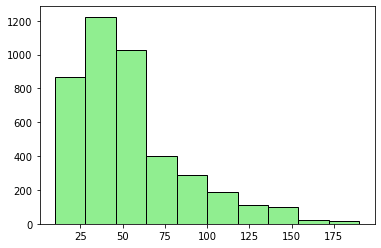

In [44]:
plt.hist(df['Total Expenses'],color='lightgreen',edgecolor='black')
plt.show()

In [45]:
df['Total Expenses'].value_counts().sort_values(ascending=False)
# d2 = d1.to_frame()
# d2.head(50)

45     140
46     138
17     108
38     103
39      98
      ... 
105      1
168      1
181      1
122      1
14       1
Name: Total Expenses, Length: 156, dtype: int64

In [46]:
df['Total Expenses'].unique()

array([ 36,  39,  38,  26,  55,  72,  87,  47,  40,  90,  52, 109,  88,
        35,  27,  54,  16,  29,  19,  15, 110,  53, 126,  66,  45,  46,
        25,  23,  64,  50,  41,  49,  56,  58, 102,  98,  28,  43,  20,
        42,  21,  71,  65,  86,  17,  44,  63, 128, 145, 127,  97,  30,
        59, 101,  24,  34,  51,  37,  85,  91, 129,  32,  78,  33,  11,
       125,  69, 113,  18,  74, 112,  57,  68, 143, 142, 124,  22,  12,
        79,  77,  94, 115,  70, 146,  76, 116,  62, 132,  61,  48, 152,
       131,  60, 147, 119,  96, 134, 118,  67, 159, 133,  31, 121, 111,
       135, 130, 164, 177, 165, 122,  99,  83, 141, 181, 178,  82, 180,
       108, 149, 140, 117, 189, 150, 107, 190, 114, 144, 162, 161,  93,
        84,  73,  95,  75, 100, 138, 139, 155, 156,  92, 103, 106,  89,
       104,  81,  10, 148, 105, 120, 153, 168, 166, 167,  80, 176,  14],
      dtype=int64)

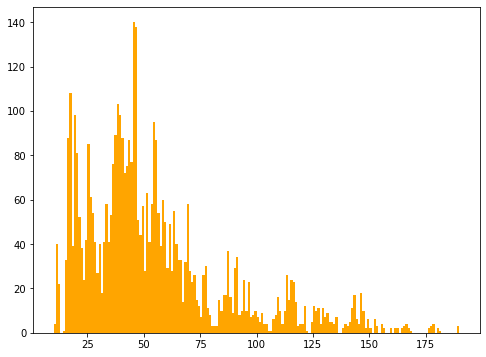

In [47]:
plt.figure(figsize=(8,6))
plt.hist(df['Total Expenses'],bins=list(range(10,191)),color='orange')
# plt.xlim(0,190)
plt.show()

#### 12) Compare Frequency Distribution of Profit and Budget Profit on a histogram for the Oregon State

In [48]:
d11 = df[df['State']=='Oregon']
d11.shape

(264, 20)

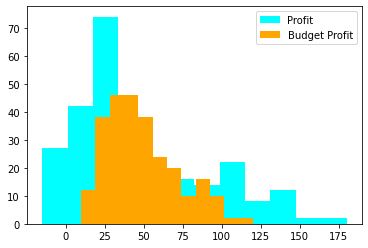

In [49]:
plt.hist(d11['Profit'],bins='auto',color='cyan',label='Profit')
plt.hist(d11['Budget Profit'],bins='auto',color='orange',label='Budget Profit')
plt.legend()
plt.show()

#### 13) Compare Frequency of COGS and Budget COGS on a histogram and for the Eastern Market for the Product 'Cafe Mocha'

In [50]:
df["Market"].value_counts()

Central    1344
West       1344
East        888
South       672
Name: Market, dtype: int64

In [51]:
d12 = df[(df['Market']=='East') & (df['Product']=='Caffe Mocha')]
d12.shape

(120, 20)

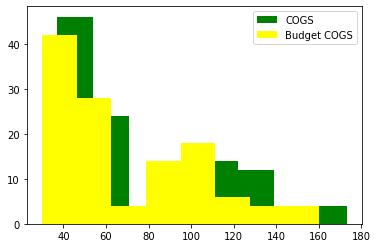

In [52]:
plt.hist(d12['COGS'],bins='auto',color='green',label='COGS')
plt.hist(d12['Budget COGS'],bins='auto',color='yellow',label='Budget COGS')
plt.legend()
plt.show()

#### 14) Compare Sales vs Profit on a histogram for the Eastern or Central Market and for Decaf Type

In [53]:
df['Type'].value_counts()

Regular    2400
Decaf      1848
Name: Type, dtype: int64

In [54]:
d12 = df[((df['Market']=='East') | (df['Market']=='Central')) & (df['Type']=='Decaf')]
d12.shape

(912, 20)

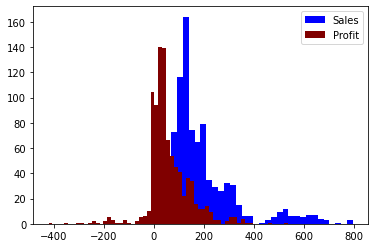

In [55]:
plt.hist(d12['Sales'],bins='auto',color='blue',label='Sales')
plt.hist(d12['Profit'],bins='auto',color='maroon',label='Profit')
plt.legend()
plt.show()

#### 15) Depict the quartile distribution of COGS where Sales is greater than 400

(418, 20)


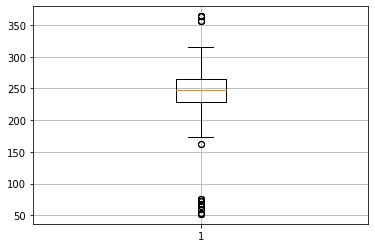

In [56]:
d13 = df[df['Sales']>400]
print(d13.shape)
plt.boxplot(d13['COGS'])
plt.grid()
plt.show()


#### 16) Depict the quartile distribution of Budget Profit for Decaf Espresso

In [57]:
df['Product'].value_counts()

Colombian            480
Caffe Mocha          480
Lemon                480
Decaf Espresso       408
Decaf Irish Cream    384
Chamomile            384
Darjeeling           384
Green Tea            288
Earl Grey            288
Caffe Latte          216
Amaretto             192
Mint                 192
Regular Espresso      72
Name: Product, dtype: int64

In [58]:
d14 = df[df['Product']=='Decaf Espresso']
print(d14.shape)

(408, 20)


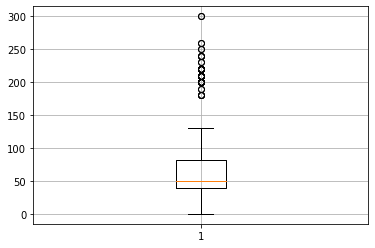

In [59]:
plt.boxplot(d14['Budget Profit'])
plt.grid()
plt.show()

#### 17) Find the Market, Product and Type where Sales is maximum

In [60]:
sale_max = df['Sales'].max()
print(sale_max)

912


In [61]:
# d15 = df.query(f'Sales=={sale_max}')
d15 = df.query('Sales==912')  # df[df['Sales']==912]
d15

,Area Code,Date,Market,Market Size,Product,Product Line,Product Type,State,Type,Budget COGS,Budget Margin,Budget Profit,Budget Sales,COGS,Inventory,Margin,Marketing,Profit,Sales,Total Expenses
1154,845,41091,East,Major Market,Colombian,Beans,Coffee,New York,Regular,340,520,370,860,364,2654,548,127,370,912,178
1196,707,41091,West,Major Market,Colombian,Beans,Coffee,California,Regular,450,690,530,1140,364,2654,548,127,370,912,178


In [62]:
d15[['Market','Product','Type','Sales']]

,Market,Product,Type,Sales
1154,East,Colombian,Regular,912
1196,West,Colombian,Regular,912


#### 18) Find State and Market with Maximum Profit or Maximum Budget Profit

In [63]:
profit_max = df['Profit'].max()
budgetProfit_max = df['Budget Profit'].max()
print(profit_max)
print(budgetProfit_max)

778
560


In [64]:
d16 = df[(df['Profit']==778) | (df['Budget Profit']==560)]
d16

,Area Code,Date,Market,Market Size,Product,Product Line,Product Type,State,Type,Budget COGS,Budget Margin,Budget Profit,Budget Sales,COGS,Inventory,Margin,Marketing,Profit,Sales,Total Expenses
1139,508,41091,East,Major Market,Colombian,Beans,Coffee,Massachusetts,Regular,40,590,560,630,52,-1493,613,17,564,665,49
1316,508,41122,East,Major Market,Colombian,Beans,Coffee,Massachusetts,Regular,40,590,560,630,52,-2033,612,17,563,664,49
3263,978,41456,East,Major Market,Colombian,Beans,Coffee,Massachusetts,Regular,40,590,560,630,52,-1493,613,17,778,659,46
3440,617,41487,East,Major Market,Colombian,Beans,Coffee,Massachusetts,Regular,40,590,560,630,52,-2033,612,17,777,658,46


In [65]:
d16[['State','Market','Profit','Budget Profit']]

,State,Market,Profit,Budget Profit
1139,Massachusetts,East,564,560
1316,Massachusetts,East,563,560
3263,Massachusetts,East,778,560
3440,Massachusetts,East,777,560


#### 19) Find Product, State and Market where Total Expenses are minimum

In [66]:
te_min = df['Total Expenses'].min()
print(te_min)

10


In [67]:
d17 = df[df['Total Expenses']==10]
d17.shape

(4, 20)

In [68]:
d17[['Product','State','Market','Total Expenses']]

,Product,State,Market,Total Expenses
2910,Green Tea,New Hampshire,East,10
3087,Green Tea,New Hampshire,East,10
3339,Caffe Latte,Nevada,West,10
3516,Caffe Latte,Nevada,West,10


#### 20) Statisically infer the State, Product and Market chosen to further expnad/invest into for the Coffee Dataset

In [69]:
max_sale = df['Sales'].max()
max_profit = df['Profit'].max()
min_te = df['Total Expenses'].min()
print(max_sale,max_profit,min_te)

912 778 10


In [70]:
d18 = df[(df['Sales']==912) | (df['Profit']==778) | (df['Total Expenses']==10)]
d18.shape

(7, 20)

In [71]:
d18[['State','Market','Product','Type','Sales','Profit','Total Expenses']]

,State,Market,Product,Type,Sales,Profit,Total Expenses
1154,New York,East,Colombian,Regular,912,370,178
1196,California,West,Colombian,Regular,912,370,178
2910,New Hampshire,East,Green Tea,Regular,43,44,10
3087,New Hampshire,East,Green Tea,Regular,43,44,10
3263,Massachusetts,East,Colombian,Regular,659,778,46
3339,Nevada,West,Caffe Latte,Regular,43,44,10
3516,Nevada,West,Caffe Latte,Regular,43,44,10


#### 21) Statisically infer the State, Product and Market chosen to further withhold the Coffee Business

In [72]:
min_sale = df['Sales'].min()
min_profit = df['Profit'].min()
max_te = df['Total Expenses'].max()
print(min_sale,min_profit,max_te)

17 -638 190


In [73]:
d19 = df[(df['Sales']==17) | (df['Profit']==-638) | (df['Total Expenses']==190)]
d19.shape

(3, 20)

In [74]:
d19[['State','Market','Product','Type','Sales','Profit','Total Expenses']]

,State,Market,Product,Type,Sales,Profit,Total Expenses
154,Nevada,West,Green Tea,Regular,17,-354,126
1385,Nevada,West,Chamomile,Decaf,412,49,190
3687,Nevada,West,Green Tea,Regular,20,-638,147


## Pandas Plots

#### 22) Depict Market and Type wise sum of Budget Profit on a bar chart

In [75]:
d6 = df.groupby(['Market','Type'])['Budget Profit'].sum()
d6

Market   Type   
Central  Decaf      43880
         Regular    48700
East     Decaf      10800
         Regular    45980
South    Decaf      16320
         Regular    18720
West     Decaf      36240
         Regular    38120
Name: Budget Profit, dtype: int64

In [76]:
type(d6)

pandas.core.series.Series

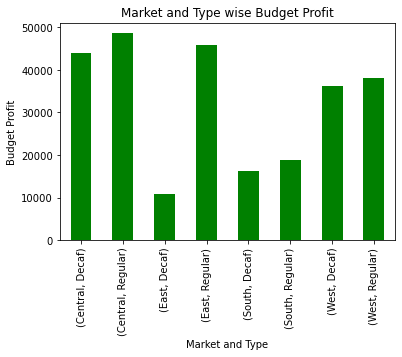

In [77]:
d6.plot(kind='bar',color='green')
plt.title('Market and Type wise Budget Profit')
plt.ylabel('Budget Profit')
plt.xlabel('Market and Type')
plt.xticks(rotation=90)
plt.show()

#### 23) Depict Product Type and State wise mean of Sales on a area chart

In [78]:
df['Product Type'].value_counts()

Espresso      1176
Coffee        1056
Herbal Tea    1056
Tea            960
Name: Product Type, dtype: int64

In [79]:
d7 = df.groupby(['Product Type','State'])['Sales'].mean()
# len(d7)
d7

Product Type  State      
Coffee        California     343.027778
              Colorado       229.819444
              Connecticut    288.458333
              Florida        249.458333
              Illinois       376.270833
                                ...    
Tea           Ohio           249.458333
              Oregon         185.583333
              Utah            92.638889
              Washington     135.888889
              Wisconsin      131.375000
Name: Sales, Length: 76, dtype: float64

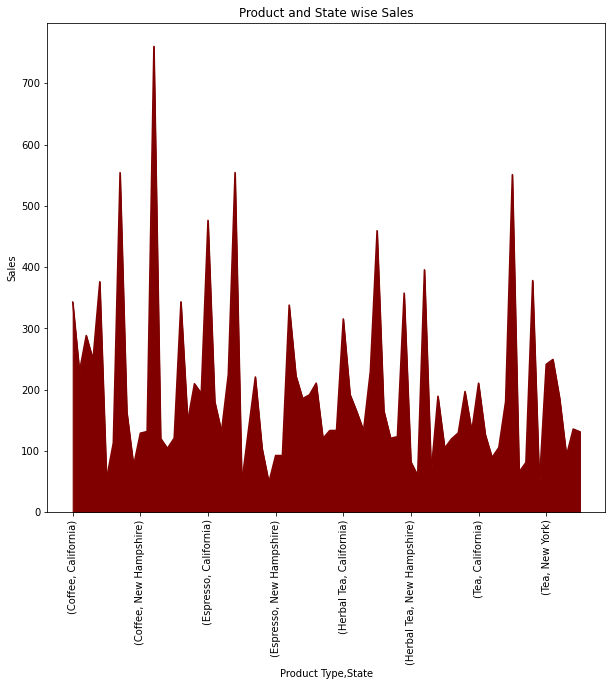

In [80]:
plt.figure(figsize=(10,9))
d7.plot(kind='area',color='maroon')
plt.ylabel('Sales')
plt.title('Product and State wise Sales')
plt.xticks(rotation=90)
plt.show()

#### 24) Depict Product and Type wise sum of Budget COGS on a line Chart

In [81]:
d8 = df.groupby(['Product','Type'])['Budget COGS'].sum()
d8

Product            Type   
Amaretto           Regular    13420
Caffe Latte        Regular    12820
Caffe Mocha        Regular    36820
Chamomile          Decaf      25360
Colombian          Regular    51240
Darjeeling         Regular    22880
Decaf Espresso     Decaf      31660
Decaf Irish Cream  Decaf      32220
Earl Grey          Regular    21040
Green Tea          Regular    13220
Lemon              Decaf      32560
Mint               Decaf      15140
Regular Espresso   Regular     9500
Name: Budget COGS, dtype: int64

In [82]:
type(d8)

pandas.core.series.Series

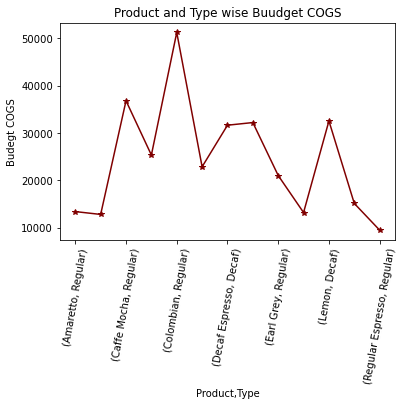

In [83]:
d8.plot(kind='line',color='maroon',marker="*")
plt.ylabel('Budegt COGS')
plt.title('Product and Type wise Buudget COGS')
plt.xticks(rotation=80)
plt.show()

#### 25) Depict Product and Type wise sum of Budget Profit and Budget Sales on a line Chart

In [84]:
d9 = df.groupby(['Product','Type'])['Budget Profit','Budget Sales'].sum()
d9

C:\Users\Jain\AppData\Local\Temp/ipykernel_7728/85467858.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  d9 = df.groupby(['Product','Type'])['Budget Profit','Budget Sales'].sum()


,,Budget Profit,Budget Sales
Product,Type,,
Amaretto,Regular,7020,27200
Caffe Latte,Regular,10100,30540
Caffe Mocha,Regular,23280,84600
Chamomile,Decaf,24920,63840
Colombian,Regular,57800,134380
Darjeeling,Regular,22860,57360
Decaf Espresso,Decaf,29460,75720
Decaf Irish Cream,Decaf,19060,67040
Earl Grey,Regular,17600,50900


In [85]:
type(d9)

pandas.core.frame.DataFrame

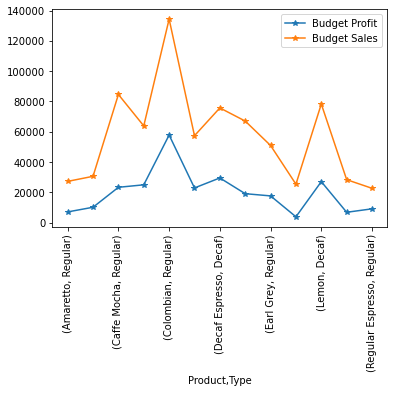

In [86]:
d9.plot(kind='line',marker='*')
plt.xticks(rotation=90)
plt.show()

#### 26) Depict Market and Product Type based mean of Sales on a bar chart and on a stacked bar chart separately

In [87]:
d10 = df.groupby(['Market','Product Type'])['Sales'].mean()
d10

Market   Product Type
Central  Coffee          179.895833
         Espresso        207.295139
         Herbal Tea      202.047619
         Tea             203.500000
East     Coffee          337.148810
         Espresso        201.654167
         Herbal Tea      191.486111
         Tea             121.882576
South    Coffee          173.223958
         Espresso        156.215278
         Herbal Tea      133.734375
West     Coffee          185.410256
         Espresso        194.188889
         Herbal Tea      231.692308
         Tea             200.611111
Name: Sales, dtype: float64

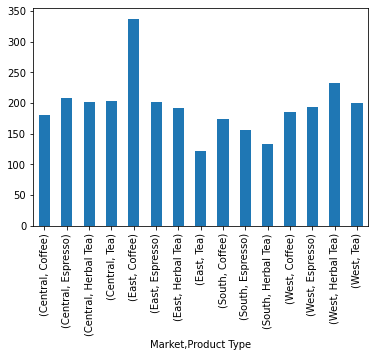

In [88]:
d10.plot(kind='bar')
plt.show()

In [89]:
d10 = d10.unstack()
d10

Product Type,Coffee,Espresso,Herbal Tea,Tea
Market,,,,
Central,179.895833,207.295139,202.047619,203.500000
East,337.148810,201.654167,191.486111,121.882576
South,173.223958,156.215278,133.734375,NaN
West,185.410256,194.188889,231.692308,200.611111


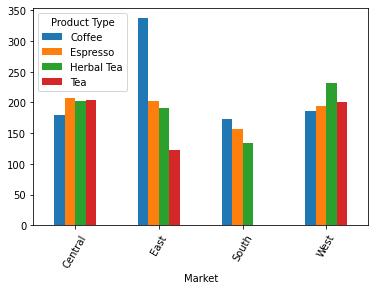

In [90]:
# plt.figure(figsize=(10,8))
d10.plot(kind='bar')
plt.xticks(rotation=60)
plt.show()

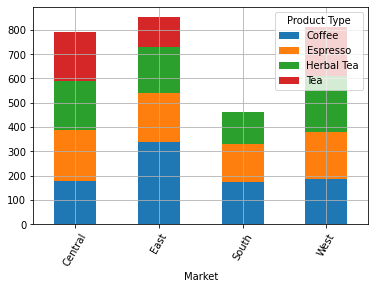

In [91]:
d10.plot(kind='bar', stacked=True)
plt.xticks(rotation=60)
plt.grid()
plt.show()
# 179+207= 386

#### 27) Find State and Market Size based mean of Sales and COGS where Market is not Central and Profit is over 350. Depict the result on a line chart, stacked bar and area chart separately 

In [92]:
dfr1 = df[(df['Market']!='Central') & (df['Profit']>350)]
dfr1.shape

(65, 20)

In [142]:
dfr2 = df[(df['Profit']>350) & (df['Market']!='Central')]
dfr2.shape

(65, 20)

In [94]:
d11 = dfr1.groupby(['State','Market Size'])['Sales','COGS'].mean()
d11

C:\Users\Jain\AppData\Local\Temp/ipykernel_7728/3876537752.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  d11 = dfr1.groupby(['State','Market Size'])['Sales','COGS'].mean()


,,Sales,COGS
State,Market Size,,
California,Major Market,794.125000,312.125000
Massachusetts,Major Market,566.809524,64.000000
Nevada,Small Market,676.500000,293.000000
New York,Major Market,770.461538,285.038462


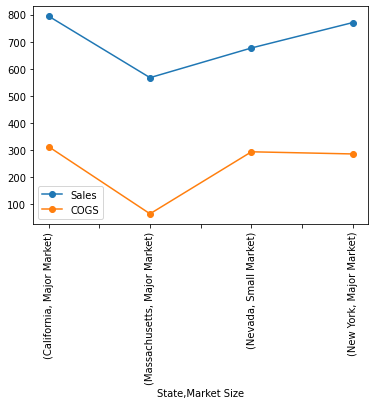

In [95]:
d11.plot(kind='line',marker='o')
plt.xticks(rotation=90)
plt.show()

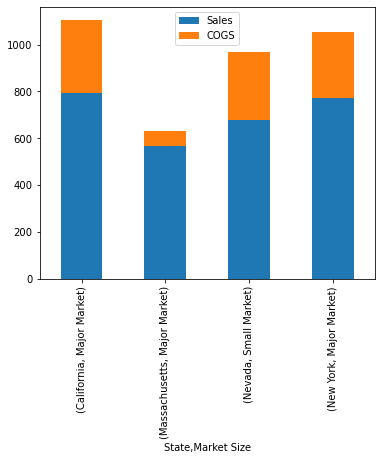

In [96]:
d11.plot(kind='bar',stacked=True,figsize=(6,5))
plt.xticks(rotation=90)
plt.show()

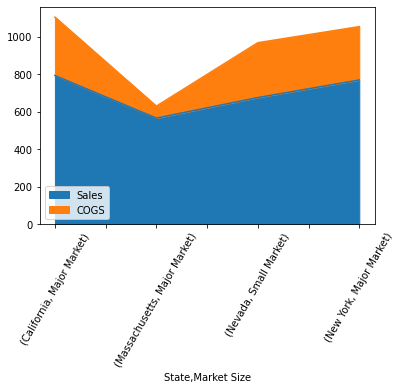

In [97]:
d11.plot(kind='area')
plt.xticks(rotation=60)
plt.show()

#### 28) Find Product and Market Size based mean of Budget COGS and Inventory where Type is Regular and neither Product or its Type is Espresso. Depict the result on a line chart, stacked bar and area chart separately 

In [98]:
# ds1 = df[(df['Type']=='Regular') & (df['Product Type']!='Espresso')]
# ds1.shape
df['Product'].value_counts()

Colombian            480
Caffe Mocha          480
Lemon                480
Decaf Espresso       408
Decaf Irish Cream    384
Chamomile            384
Darjeeling           384
Green Tea            288
Earl Grey            288
Caffe Latte          216
Amaretto             192
Mint                 192
Regular Espresso      72
Name: Product, dtype: int64

In [99]:
df['Product Type'].value_counts()

Espresso      1176
Coffee        1056
Herbal Tea    1056
Tea            960
Name: Product Type, dtype: int64

In [100]:
df['Type'].value_counts()

Regular    2400
Decaf      1848
Name: Type, dtype: int64

In [101]:
ds1 = df[(df['Product']!='Decaf Espresso') & (df['Product']!='Regular Espresso')]
ds1.shape

(3768, 20)

In [102]:
ds2 = ds1[ds1['Product Type']!='Espresso']
ds2.shape

(3072, 20)

In [103]:
ds3 = ds2[ds2['Type']=='Regular']
ds3.shape

(1632, 20)

In [104]:
dfa = df[(df['Type']=='Regular') & (df['Product Type']!='Espresso') & (df['Product']!='Decaf Espresso') & (df['Product']!='Regular Espresso')]
dfa.shape

(1632, 20)

In [143]:
dfr2 = df[(df['Type']=='Regular') & (df['Product Type']!='Espresso') & (df['Product']!='Regular Espresso')]
dfr2.shape

(1632, 20)

In [106]:
d12 = ds3.groupby(['Product','Market Size'])['Budget COGS','Inventory'].mean()
d12

C:\Users\Jain\AppData\Local\Temp/ipykernel_7728/1065607685.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  d12 = ds3.groupby(['Product','Market Size'])['Budget COGS','Inventory'].mean()


Budget COGS    Inventory
Product    Market Size                           
Amaretto   Major Market   103.888889   981.750000
           Small Market    49.500000   596.583333
Colombian  Major Market   171.354167   905.020833
           Small Market    63.680556   575.902778
Darjeeling Major Market    57.619048   734.380952
           Small Market    61.111111   740.518519
Earl Grey  Major Market    66.833333   726.783333
           Small Market    77.500000   778.880952
Green Tea  Major Market    44.000000   608.416667
           Small Market    47.261905  1108.916667

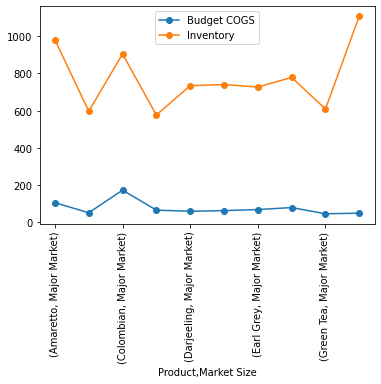

In [107]:
d12.plot(kind='line',marker='o')
plt.xticks(rotation=90)
plt.show()

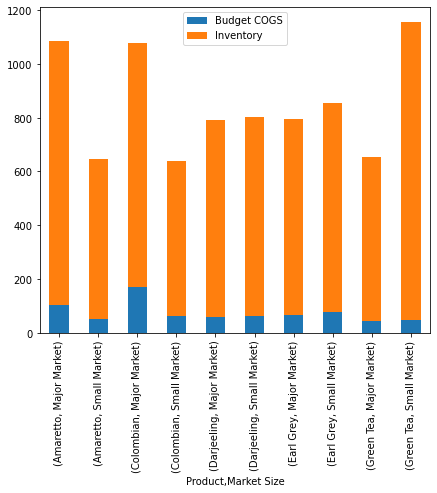

In [108]:
d12.plot(kind='bar',stacked=True,figsize=(7,6))
plt.xticks(rotation=90)
plt.show()

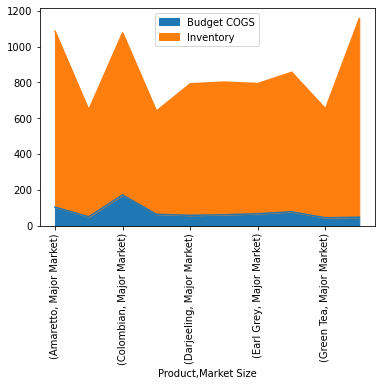

In [109]:
d12.plot(kind='area')
plt.xticks(rotation=90)
plt.show()

### Seaborn EDA

C:\Users\Jain\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


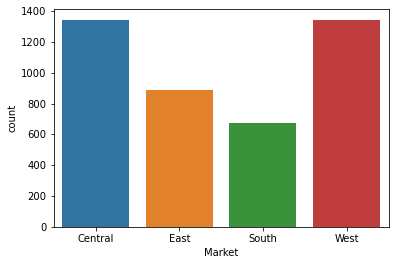

In [110]:
sns.countplot(df['Market'])
plt.show()

C:\Users\Jain\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


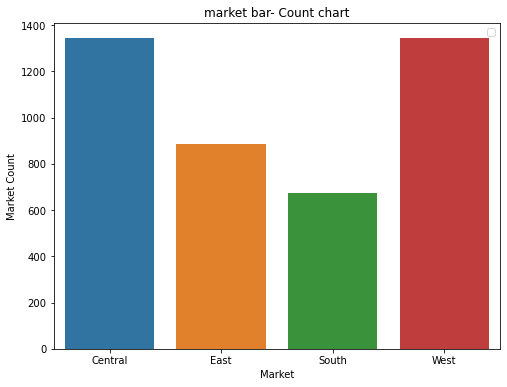

In [111]:
plt.figure(figsize=(8,6))
sns.countplot(df['Market'])
plt.legend()
plt.title('market bar- Count chart')
plt.xlabel('Market')
plt.ylabel('Market Count')
plt.show()

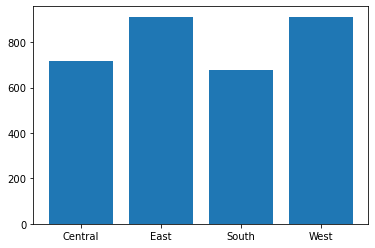

In [112]:
plt.bar(df['Market'],df['Sales'])
plt.show()

C:\Users\Jain\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


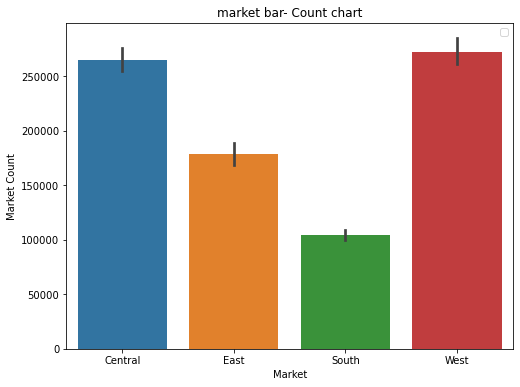

In [113]:
plt.figure(figsize=(8,6))
sns.barplot(df['Market'],df['Sales'],estimator=sum)
plt.legend()
plt.title('market bar- Count chart')
plt.xlabel('Market')
plt.ylabel('Market Count')
plt.show()

In [117]:
# plt.figure(figsize=(8,6))
# sns.countplot(x=df['Product'],y=df['Sales'])
# plt.xticks(rotation=60)
# plt.show()

#### 1) Depict Product based on Market Size on a count plot

In [118]:
s1 = df.groupby(['Market Size','Product'])['Product'].count()
s1

Market Size   Product          
Major Market  Amaretto              72
              Caffe Latte           48
              Caffe Mocha          192
              Chamomile            144
              Colombian            192
              Darjeeling           168
              Decaf Espresso       144
              Decaf Irish Cream    144
              Earl Grey            120
              Green Tea            120
              Lemon                192
              Mint                 120
              Regular Espresso      48
Small Market  Amaretto             120
              Caffe Latte          168
              Caffe Mocha          288
              Chamomile            240
              Colombian            288
              Darjeeling           216
              Decaf Espresso       264
              Decaf Irish Cream    240
              Earl Grey            168
              Green Tea            168
              Lemon                288
              Mint              

C:\Users\Jain\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


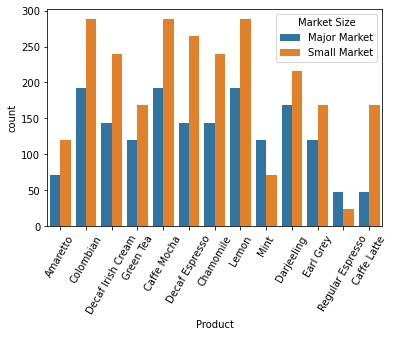

In [119]:
# plt.figure(figsize=(8,6))
sns.countplot(df['Product'],hue=df['Market Size'])
plt.xticks(rotation=60)
plt.show()

In [120]:
s1.unstack(level=0)

Market Size,Major Market,Small Market
Product,,
Amaretto,72,120
Caffe Latte,48,168
Caffe Mocha,192,288
Chamomile,144,240
Colombian,192,288
Darjeeling,168,216
Decaf Espresso,144,264
Decaf Irish Cream,144,240
Earl Grey,120,168


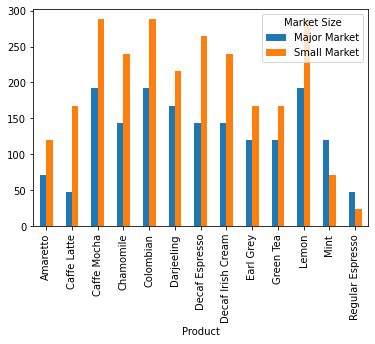

In [121]:
s1.unstack(level=0).plot(kind='bar')
plt.show()

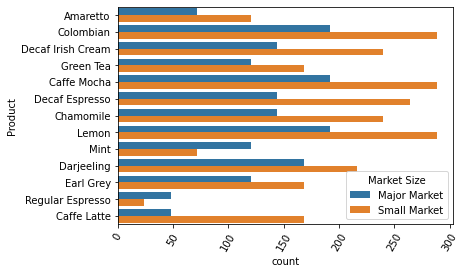

In [122]:
# plt.figure(figsize=(8,6))
sns.countplot(y=df['Product'],hue=df['Market Size'])
plt.xticks(rotation=60)
plt.show()

#### 2) Depict State based on Market on a count plot

In [123]:
df.groupby(['Market','State'])['State'].count()

Market   State        
Central  Colorado         264
         Illinois         216
         Iowa             216
         Missouri         216
         Ohio             216
         Wisconsin        216
East     Connecticut      168
         Florida          216
         Massachusetts    144
         New Hampshire    168
         New York         192
South    Louisiana        168
         New Mexico       168
         Oklahoma         168
         Texas            168
West     California       288
         Nevada           264
         Oregon           264
         Utah             288
         Washington       240
Name: State, dtype: int64

C:\Users\Jain\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


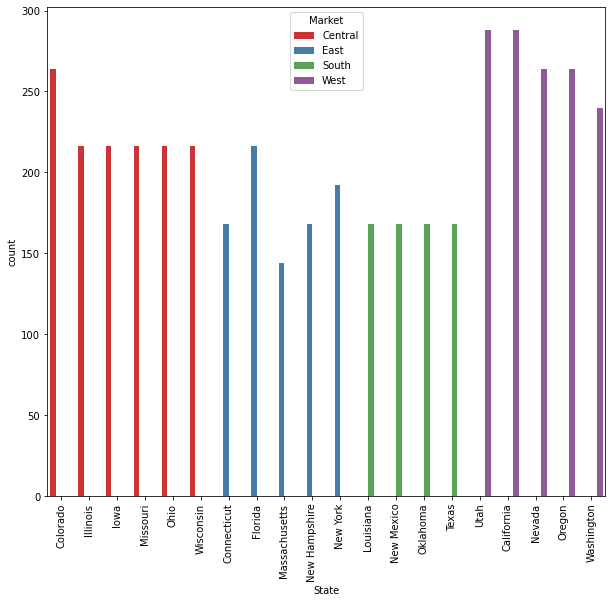

In [124]:
plt.figure(figsize=(10,9))
sns.countplot(df['State'],hue=df['Market'],palette='Set1')
# palette = Set1, Set2, Set3, bright
plt.xticks(rotation=90)
plt.show()

C:\Users\Jain\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


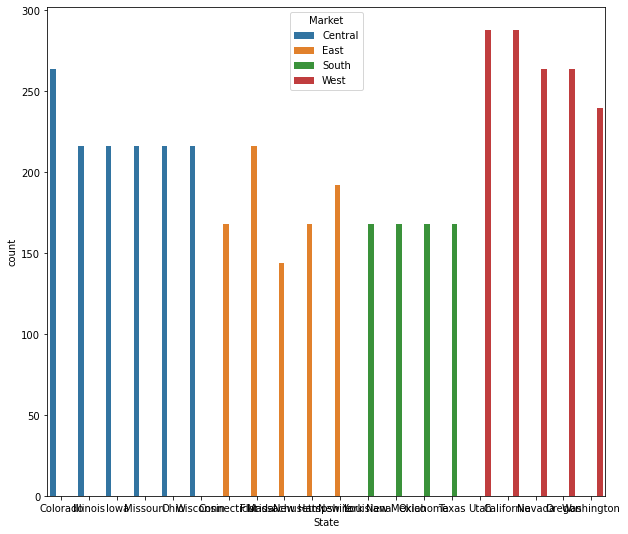

In [125]:
plt.figure(figsize=(10,9))
sns.countplot('State',data=df, hue='Market')
# plt.xticks(rotation=90)
plt.show()

#### 3) Depict the Product Type vs Total Expenses on a Violin Plot based on Market

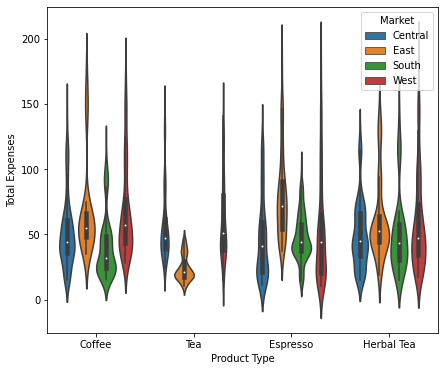

In [126]:
plt.figure(figsize=(7,6))
sns.violinplot(x='Product Type',y='Total Expenses',data=df,
               hue='Market')
plt.show()

C:\Users\Jain\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


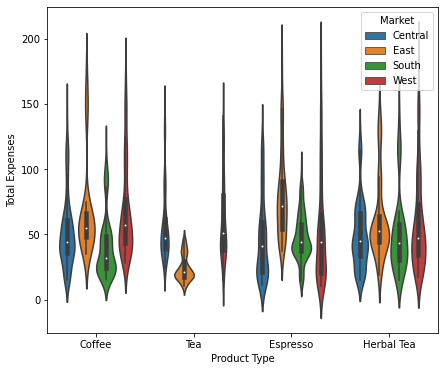

In [127]:
plt.figure(figsize=(7,6))
sns.violinplot('Product Type','Total Expenses',data=df,hue='Market')
plt.show()

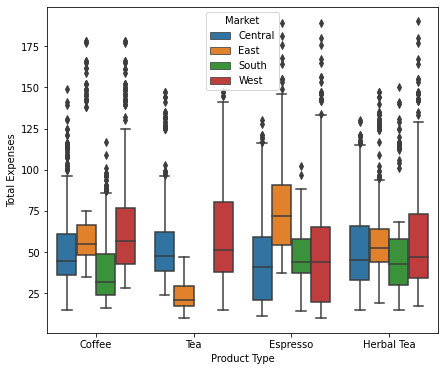

In [128]:
plt.figure(figsize=(7,6))
sns.boxplot(x='Product Type',y='Total Expenses',data=df,
               hue='Market')
plt.show()

#### 4) Depcit Market vs Budget COGS on a boxplot

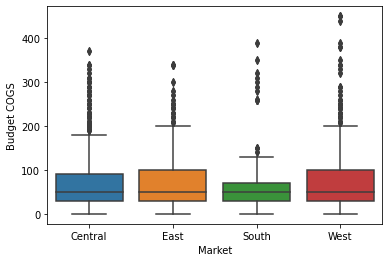

In [129]:
sns.boxplot(x=df['Market'],y=df['Budget COGS'])
plt.show()

#### 5) Depict Product vs Margin on a boxplot based on Market Size

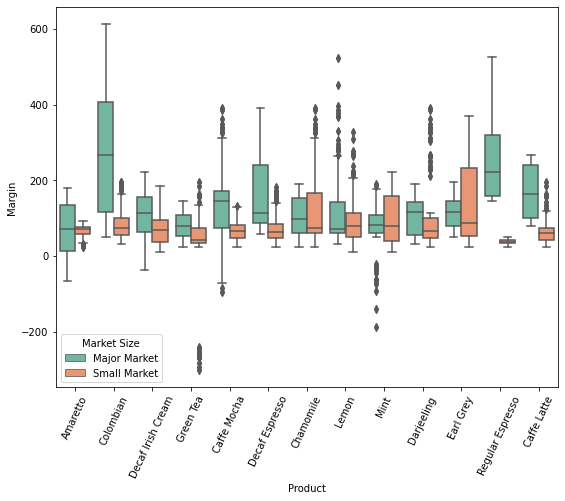

In [130]:
plt.figure(figsize=(9,7))
sns.boxplot(x=df['Product'],y=df['Margin'],
            hue=df['Market Size'],palette="Set2")
plt.xticks(rotation=65)
plt.show()

#### 6) Depict the Market vs Budget Sales on a Violin Plot based on Product Type where product is Colombian or Darjeeling

In [131]:
df['Product'].value_counts()

Colombian            480
Caffe Mocha          480
Lemon                480
Decaf Espresso       408
Decaf Irish Cream    384
Chamomile            384
Darjeeling           384
Green Tea            288
Earl Grey            288
Caffe Latte          216
Amaretto             192
Mint                 192
Regular Espresso      72
Name: Product, dtype: int64

In [132]:
ds1 = df[(df['Product']=='Colombian') | (df['Product']=='Darjeeling')]
ds1.shape

(864, 20)

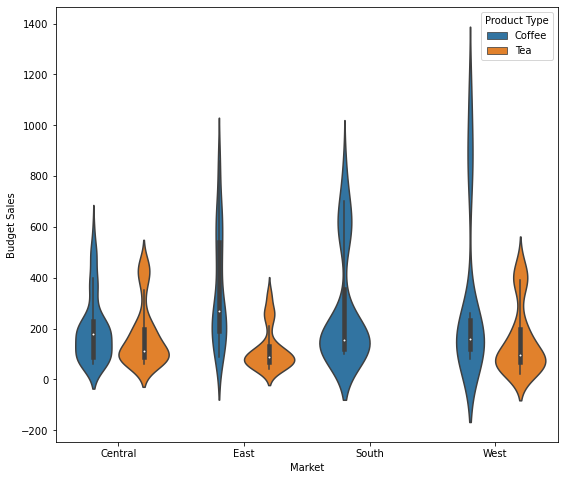

In [133]:
plt.figure(figsize=(9,8))
sns.violinplot(x='Market',y='Budget Sales',data=ds1,
               hue='Product Type')
plt.show()

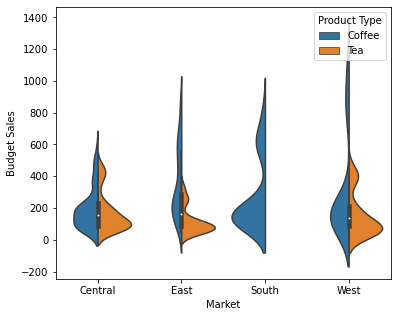

In [134]:
plt.figure(figsize=(6,5))
sns.violinplot(x='Market',y='Budget Sales',data=ds1,
               hue='Product Type',split=True)
plt.show()

#### 7) Depict the Product vs Inventory on a Box Plot based on Product Type where State is California or Nevada

In [135]:
ds2 = df[(df['State']=='California') | (df['State']=='Nevada')]
ds2.shape

(552, 20)

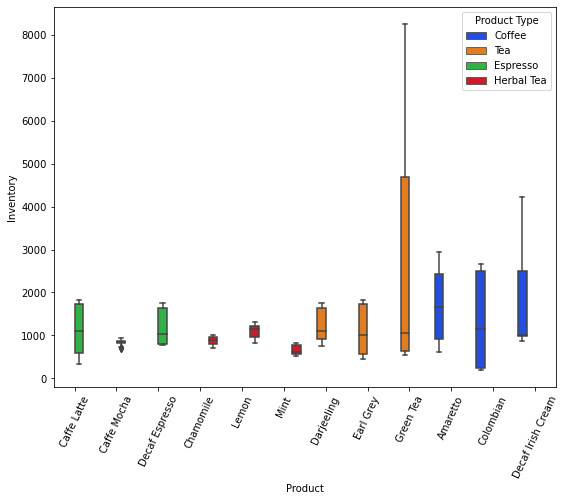

In [136]:
plt.figure(figsize=(9,7))
sns.boxplot(x=ds2['Product'],y=ds2['Inventory'],
            hue=df['Product Type'],palette="bright")
plt.xticks(rotation=65)
plt.show()

#### 8) Generate Pairplot for the Coffee dataset where Type is Regular including fields- Budget Sales, Budget Profit, Budget COGS, Sales, Profit and COGS

In [137]:
df.shape

(4248, 20)

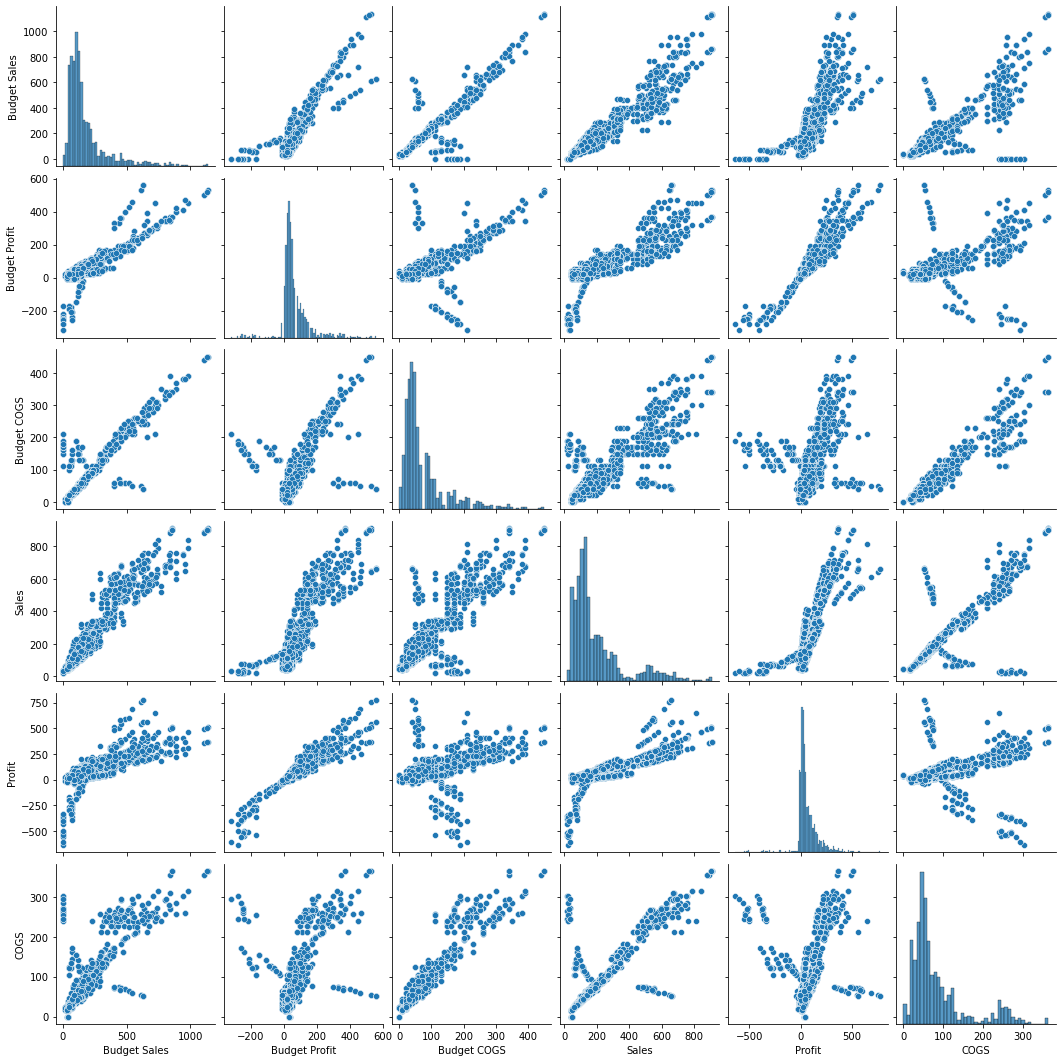

In [138]:
ds3 = df.query('Type=="Regular"')
ds4 = ds3[['Budget Sales','Budget Profit', 'Budget COGS','Sales','Profit','COGS']]

sns.pairplot(ds4)
plt.show()

#### 9) Generate Pairplot for the Coffee dataset where Profit is over 250 based on Type including fields- Budget Sales, Budget Profit, Budget COGS, Sales, Proift and COGS

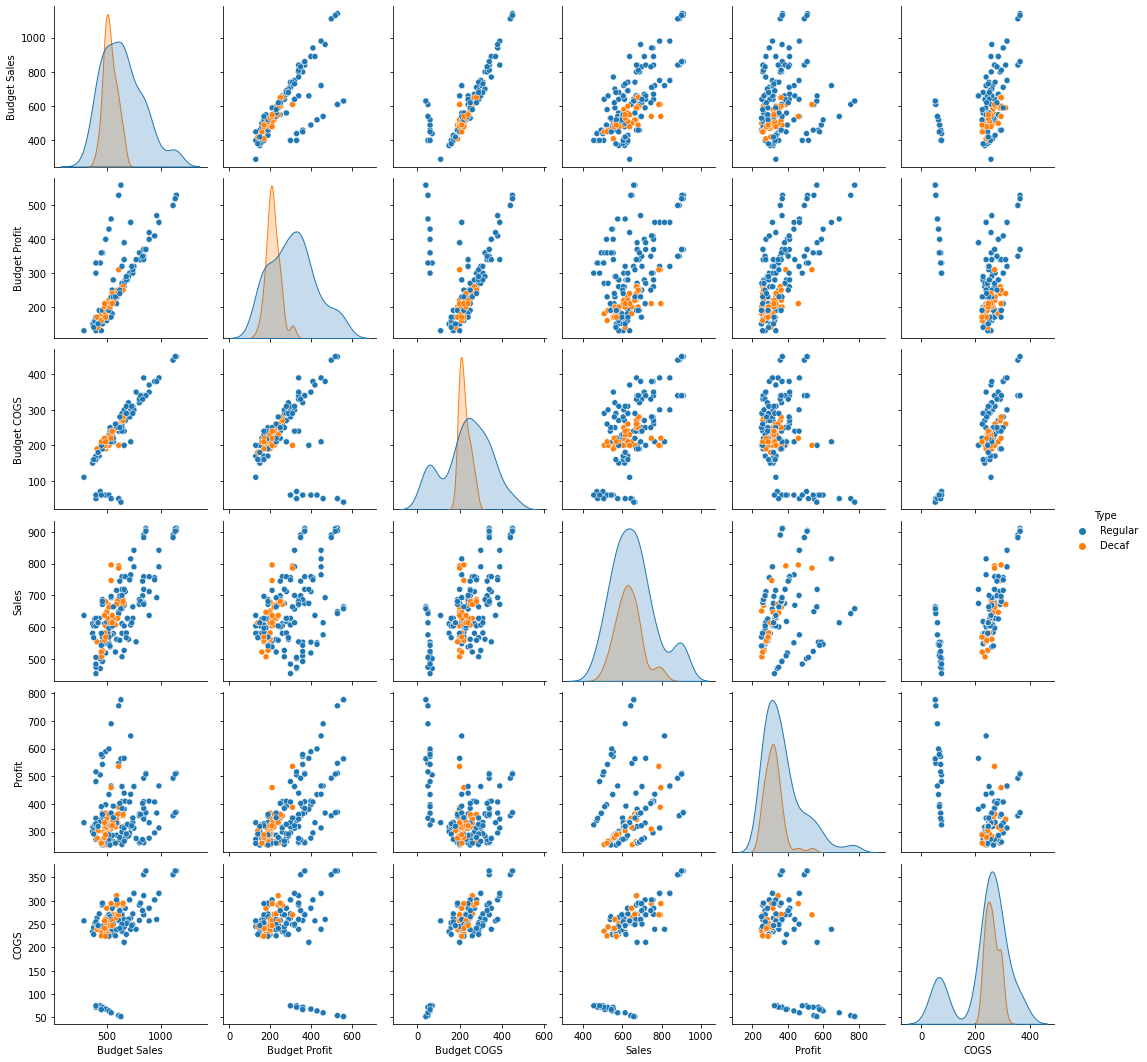

In [139]:
ds5 = df.query('Profit>250')
ds6 = ds5[['Type','Budget Sales','Budget Profit', 'Budget COGS','Sales','Profit','COGS']]

sns.pairplot(data=ds6, hue='Type')
# sns.pairplot(data=ds6 hue='Type')
plt.show()

#### 10) Generate Pairplot for the Coffee dataset where Market is Western or Central and Product Line is Beans based on Type including fields- COGS, Sales, Proift and Total Expenses

In [140]:
df['Market'].value_counts()

Central    1344
West       1344
East        888
South       672
Name: Market, dtype: int64

In [141]:
ds7=df[((df['Market']=='West') | (df['Market']=='Central')) & (df['Product Line']=='Beans')]
ds7.shape

(1344, 20)

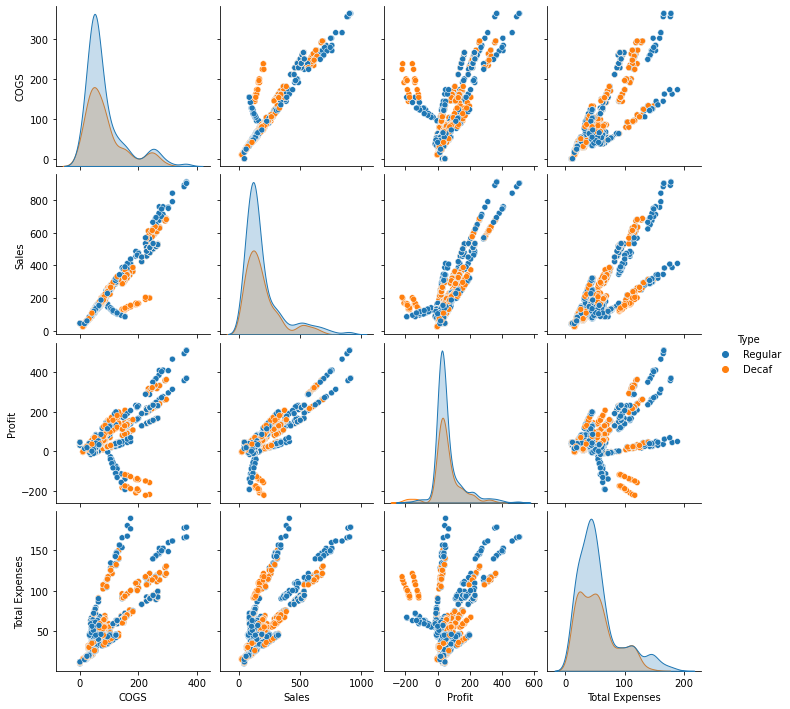

In [144]:
ds7 = df[((df['Market']=='West') | (df['Market']=='Central')) & (df['Product Line']=='Beans')]
ds8 = ds7[['Type','COGS','Sales','Profit','Total Expenses']]

sns.pairplot(data=ds8, hue='Type')
plt.show()

#### 11) Depict Product vs Sales based on Market on a Strip Plot where Type is Decaf and Market is not Central

#### Strip Plot 
A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

In [145]:
ds10 = df[(df['Type']=='Decaf') & (df['Market']!='Central')]
ds10.shape

(1224, 20)

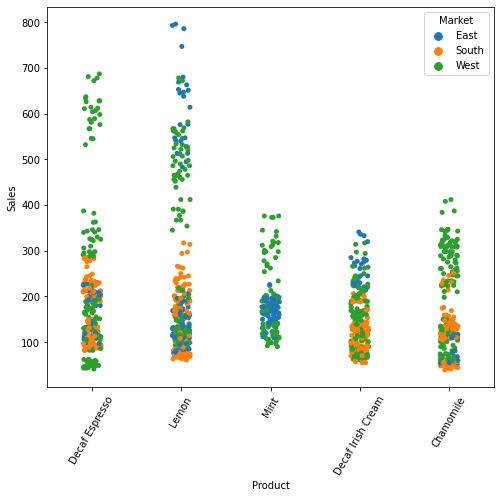

In [146]:
plt.figure(figsize=(8,7))
sns.stripplot(x='Product',y='Sales',hue='Market',data=ds10)
plt.xticks(rotation=60)
plt.show()

#### 12) Depict State vs Budget Profit based on Product Type on a Strip Plot where Market is not Western and Sales >300

In [147]:
ds11 = df[(df['Market']!='West') & (df['Sales']>300)]
ds11.shape

(417, 20)

In [148]:
ds11['Market'].unique()

array(['Central', 'East', 'South'], dtype=object)

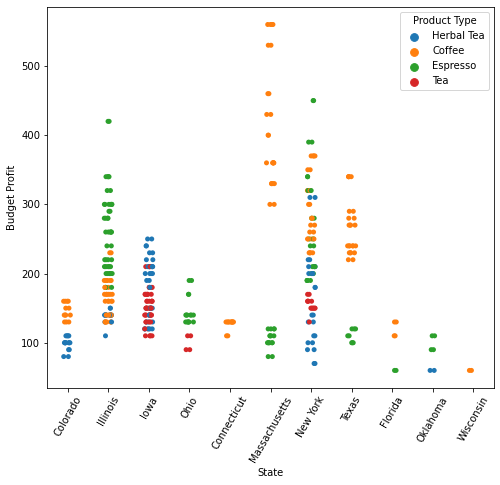

In [149]:
plt.figure(figsize=(8,7))
sns.stripplot(x='State',y='Budget Profit',hue='Product Type',data=ds11)
plt.xticks(rotation=60)
plt.show()

#### 13) Depict Market vs Total Expenses based on Type on a Swarm Plot where Sales is over 200 and Market Size is Small 

<b>SwarmPlot</b>  
This function is similar to :func:`stripplot`, but the points are adjusted
(only along the categorical axis) so that they don't overlap. This gives a
better representation of the distribution of values, but it does not scale
well to large numbers of observations. This style of plot is sometimes
called a "beeswarm".

In [150]:
df['Market Size'].value_counts()

Small Market    2544
Major Market    1704
Name: Market Size, dtype: int64

In [151]:
ds12 = df[(df['Sales']>200) & (df['Market Size']=='Small Market')]
ds12.shape

(506, 20)

C:\Users\Jain\anaconda3\anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Jain\anaconda3\anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


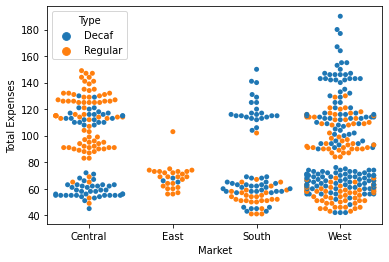

In [152]:
sns.swarmplot(x=ds12['Market'],y=ds12['Total Expenses'],
              hue=ds12['Type'])
plt.show()

#### 14) Depict correlation values on a heatmap

In [153]:
df.drop(['Area Code','Date'],axis=1, inplace=True)
df.head(2)

,Market,Market Size,Product,Product Line,Product Type,State,Type,Budget COGS,Budget Margin,Budget Profit,Budget Sales,COGS,Inventory,Margin,Marketing,Profit,Sales,Total Expenses
0,Central,Major Market,Amaretto,Beans,Coffee,Colorado,Regular,90,130,100,220,89,777,130,24,94,219,36
1,Central,Major Market,Colombian,Beans,Coffee,Colorado,Regular,80,110,80,190,83,623,107,27,68,190,39


In [154]:
corr = df.corr()
corr

,Budget COGS,Budget Margin,Budget Profit,Budget Sales,COGS,Inventory,Margin,Marketing,Profit,Sales,Total Expenses
Budget COGS,1.000000,0.750422,0.579176,0.911598,0.947762,0.579876,0.680549,0.773709,0.479862,0.862882,0.744259
Budget Margin,0.750422,1.000000,0.949637,0.955792,0.688587,0.119373,0.963460,0.543039,0.876844,0.920757,0.530776
Budget Profit,0.579176,0.949637,1.000000,0.848285,0.514967,-0.019275,0.922812,0.279315,0.937606,0.815435,0.255811
Budget Sales,0.911598,0.955792,0.848285,1.000000,0.849901,0.332216,0.901981,0.681946,0.758830,0.956538,0.661217
COGS,0.947762,0.688587,0.514967,0.849901,1.000000,0.621086,0.678797,0.818271,0.464838,0.886651,0.782534
Inventory,0.579876,0.119373,-0.019275,0.332216,0.621086,1.000000,0.061259,0.497764,-0.091545,0.325934,0.433708
Margin,0.680549,0.963460,0.922812,0.901981,0.678797,0.061259,1.000000,0.531947,0.920604,0.938809,0.521254
Marketing,0.773709,0.543039,0.279315,0.681946,0.818271,0.497764,0.531947,1.000000,0.225465,0.710515,0.966167
Profit,0.479862,0.876844,0.937606,0.758830,0.464838,-0.091545,0.920604,0.225465,1.000000,0.797331,0.199976
Sales,0.862882,0.920757,0.815435,0.956538,0.886651,0.325934,0.938809,0.710515,0.797331,1.000000,0.689350


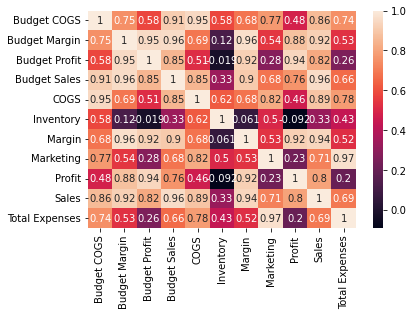

In [155]:
sns.heatmap(corr,annot=True)
plt.show()

#### 15) Depict Budget Sales vs Sales on a Joint Plot

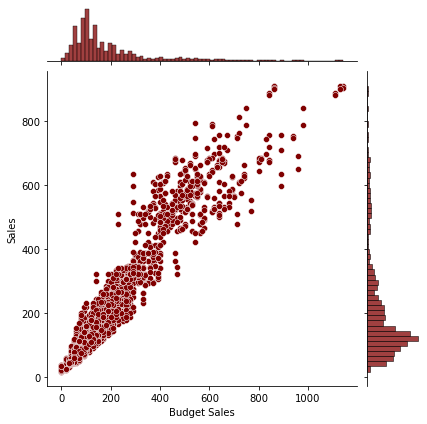

In [156]:
sns.jointplot(x=df['Budget Sales'],y=df['Sales'],
              color='maroon')
plt.show()

#### 16) Depict Total Expenses on Joint plot where Sales>300 or Profit>300 where joint plot type is scatter

In [157]:
dw1 = df[(df['Sales']>300) | (df['Profit']>300)]
dw1.shape

(674, 18)

<Figure size 720x720 with 0 Axes>

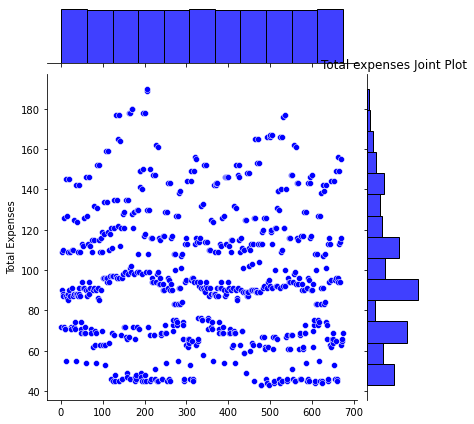

In [158]:
plt.figure(figsize=(10,10))
sns.jointplot(x=np.arange(1,675),y=dw1['Total Expenses'],color='blue',kind='scatter')
# kind = scatter, hex, reg,kde
# plt.xlabel('')
plt.ylabel('Total Expenses')
plt.title('Total expenses Joint Plot')
plt.xticks(rotation=90)
plt.show()

#### 17) Depict Budget COGS on Joint plot where Market is Eastern and Type is Regular where joint plot type is hex

In [159]:
dw2 = df[(df['Market']=='East') & (df['Type']=='Regular')]
print(dw2.shape)

(600, 18)


In [160]:
print(dw2.shape[0])

600


<Figure size 720x720 with 0 Axes>

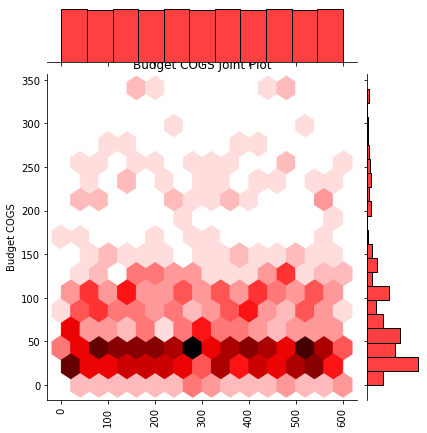

In [161]:
plt.figure(figsize=(10,10))
sns.jointplot(x=np.arange(1,601),y=dw2['Budget COGS'],color='red',kind='hex')
# kind = scatter, hex, kde
# plt.xlabel('')
plt.ylabel('Budget COGS')
plt.title('Budget COGS Joint Plot')
plt.xticks(rotation=90)
plt.show()

#### 18) Depict Marketing on Joint plot where Market is not Central and Sales is over 500 where joint plot type is kde


In [162]:
dw3 = df[(df['Market']!='Central') & (df['Sales']>500)]
dw3.shape

(225, 18)

<Figure size 720x720 with 0 Axes>

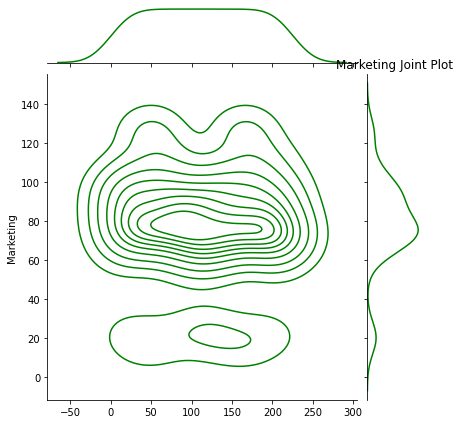

In [163]:
plt.figure(figsize=(10,10))
sns.jointplot(x=np.arange(1,226),y=dw3['Marketing'],color='green',kind='kde')
# kind = scatter, hex, kde
# plt.xlabel('')
plt.ylabel('Marketing')
plt.title('Marketing Joint Plot')
plt.xticks(rotation=90)
plt.show()